# Correlation Analysis

Correlation analysis is a statistical method used to evaluate the strength of relationship between two quantitative variables. A high correlation means that two or more variables have a strong relationship with each other, while a weak correlation means that the variables are hardly related. 

**HO:** There **is no** correlation between variables.


**H1:** There **is** a correlation between variables.


* If p value is less than 0.05, HO hypothesis is rejected

**These is the prerequisite for appplying this test**
 * 1-)Both variables should have normal distribution


If the prerequisite **is satisfied**, the **Pearson correlation coefficient** is used.

If the prerequisite **is not satisfied**, the **Spearman correlation coefficient** is used.

**Bussines Application:** Is there a correlation between tip and paid bill?


    

**HO:** There **is no** correlation between the paid bill and the tip.

**H1:** There **is**  correlation between the paid bill and the tip.

In [3]:
import seaborn as sns
tips = sns.load_dataset('tips')
df = tips.copy()
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
df["total_bill"] = df["total_bill"] - df["tip"]

In [5]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,15.98,1.01,Female,No,Sun,Dinner,2
1,8.68,1.66,Male,No,Sun,Dinner,3
2,17.51,3.50,Male,No,Sun,Dinner,3
3,20.37,3.31,Male,No,Sun,Dinner,2
4,20.98,3.61,Female,No,Sun,Dinner,4


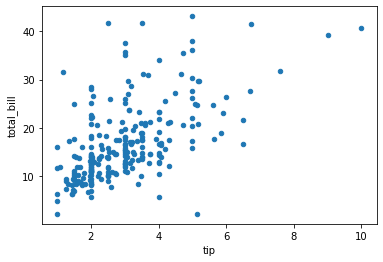

In [6]:
df.plot.scatter("tip","total_bill");

## Checking the  prerequisites for appplying this analysis

* 1-)Both variables should have normal distribution

### Normal distribution

**Shapiro-Wilks Test**

**HO:** There **is no** statistically significant difference between the sample distribution and the theoretical normal distribution.

**H1:** There **is** a statistically significant difference between the sample distribution and the theoretical normal distribution.

In [10]:
from scipy.stats import shapiro


In [11]:
shapiro(df["tip"])

ShapiroResult(statistic=0.897811233997345, pvalue=8.20057563521992e-12)

In [12]:
shapiro(df["total_bill"])

ShapiroResult(statistic=0.9135652184486389, pvalue=1.1060377613780759e-10)

In [13]:
test_statistics, pvalue = shapiro(df["tip"])
print('Test statistics = %.4f,  p-value = %.4f' % (test_statistics, pvalue))

test_statistics, pvalue = shapiro(df["total_bill"])
print('Test statistics = %.4f, p-value = %.4f' % (test_statistics, pvalue))

Test statistics = 0.8978,  p-value = 0.0000
Test statistics = 0.9136, p-value = 0.0000


**p-value = 0.0000**

Since the  p-values of both variables are  less than 0.05, we  reject the H0 hypothesis.

Thus There is a statistically significant difference between the sample distribution and the theoretical normal distribution.


 * The prerequisite **is not satisfied**, we use the **Spearman correlation coefficient** .

**Correlation Coefficient**

In [15]:
df["tip"].corr(df["total_bill"], method = "spearman")

0.593691939408997

## Hypothesis Test

**HO:** There **is no** correlation between the paid bill and the tip.

**H1:** There **is**  correlation between the paid bill and the tip.

First, we will perform **paremetric test** by pretending that the distribution of normality is achieved, then we will apply **non-paremetric** test since we know that there is no normality distribution.

### Parametric test

In [20]:
from scipy.stats.stats import pearsonr

In [21]:
test_statistics, pvalue = pearsonr(df["tip"],df["total_bill"])
print('Correlation coefficient = %.4f,  p-value = %.4f' % (test_statistics, pvalue))

Correlation coefficient = 0.5767,  p-value = 0.0000


### Non-parametric test

In [16]:
from scipy.stats import stats
stats.spearmanr(df["tip"],df["total_bill"])

SpearmanrResult(correlation=0.593691939408997, pvalue=1.2452285137560276e-24)

In [17]:
test_statistics, pvalue = stats.spearmanr(df["tip"],df["total_bill"])
print('Correlation coefficient = %.4f,  p-value = %.4f' % (test_statistics, pvalue))


Correlation coefficient = 0.5937,  p-value = 0.0000


* Since the  p-values of both variables are  less than 0.05, we  reject the H0 hypothesis.


* There is correlation between the paid bill and the tip.